**Reading Data from YFinance**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# List of stock symbols
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META','^IXIC']

# Function to retrieve historical monthly data for a given stock
def get_stock_data(stock_symbol):
    # Set the start and end dates for the historical data
    start_date = datetime.now() - timedelta(days=365 * 50)  # 50 years ago from today
    end_date = datetime.now()

    # Download historical data using yfinance
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date, interval="1mo")

    return stock_data

# Create a dictionary to store data for each stock
stock_data_dict = {}

# Iterate through the list of tickers and retrieve data
for ticker in tickers:
    stock_data = get_stock_data(ticker)
    stock_data_dict[ticker] = stock_data

# Save the data to CSV files
for ticker, data in stock_data_dict.items():
    data.to_csv(f'{ticker}_historical_data.csv')

print("Data extraction and saving completed.")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Data extraction and saving completed.


Looking the Data by looking few records

In [ ]:
import pandas as pd

# List of stock symbols
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META','^IXIC']

# Create an empty dictionary to store DataFrames for each stock
dfs = {}

# Read CSV files and store in the dictionary
for ticker in tickers:
    file_path = f'{ticker}_historical_data.csv'
    df = pd.read_csv(file_path, parse_dates=True, index_col='Date')
    dfs[ticker] = df

# Display the first few rows of each DataFrame
for ticker, df in dfs.items():
    print(f"\n{ticker} DataFrame:")
    print(df.head())


AAPL DataFrame:
                Open      High       Low     Close  Adj Close      Volume
Date                                                                     
1985-01-01  0.130022  0.138951  0.124442  0.129464   0.100182  6366416000
1985-02-01  0.129464  0.137277  0.110491  0.110491   0.085501  4733388800
1985-03-01  0.110491  0.116071  0.092634  0.098772   0.076432  4615587200
1985-04-01  0.098772  0.102679  0.087612  0.094866   0.073410  2868028800
1985-05-01  0.094866  0.099330  0.075335  0.077567   0.060023  4639129600

MSFT DataFrame:
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
1986-04-01  0.095486  0.121962  0.092882  0.111979   0.069423  547142400
1986-05-01  0.111979  0.123264  0.107639  0.121528   0.075343  333446400
1986-06-01  0.121528  0.121528  0.102431  0.106771   0.066194  293788800
1986-07-01  0.106771  0.109375  0.090278  0.098958   0.061350  460800000
1986-08-01

**Visualizing the Data**



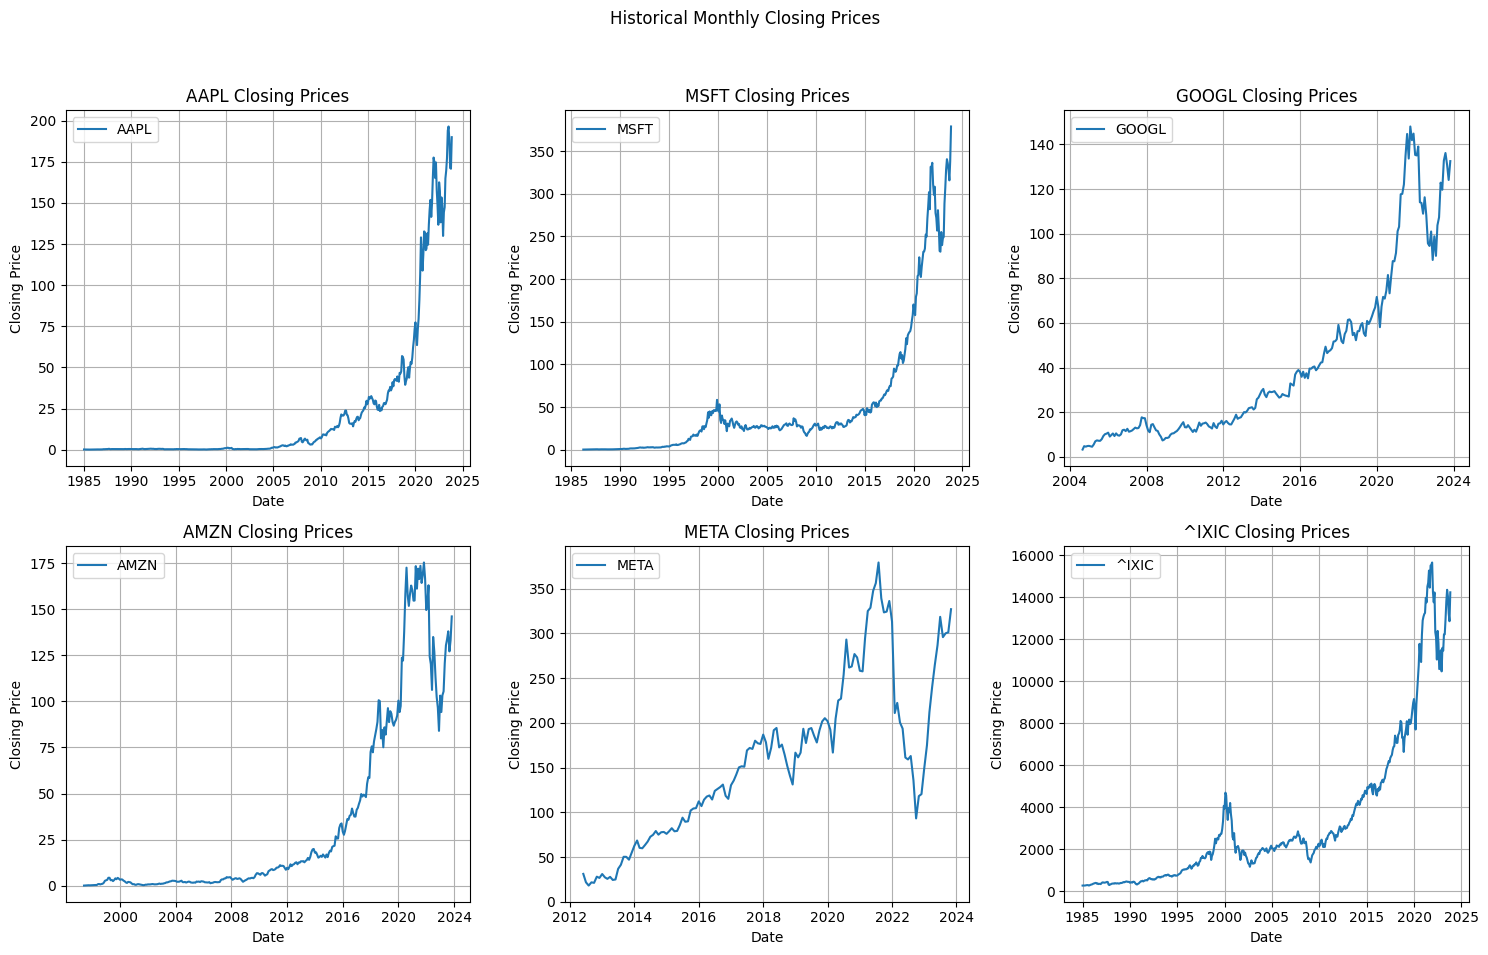

In [ ]:
import matplotlib.pyplot as plt

# Create a grid layout for subplots
num_rows = 2
num_cols = 3

# Iterate through the dictionary and plot line charts in a grid
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.suptitle('Historical Monthly Closing Prices')

# Flatten the 2D array of subplots for easier iteration
axs = axs.flatten()

for i, (ticker, df) in enumerate(dfs.items()):
    axs[i].plot(df.index, df['Close'], label=ticker)
    axs[i].set_title(f'{ticker} Closing Prices')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Closing Price')
    axs[i].legend()
    axs[i].grid(True)

# Remove any empty subplots if the number of stocks is less than the total number of subplots
for j in range(len(dfs), num_rows * num_cols):
    fig.delaxes(axs[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for the title
plt.show()


#Plotting Correlation Between Stocks

Correlation Matrix:
           AAPL      MSFT     GOOGL      AMZN      META     ^IXIC
AAPL   1.000000  0.985869  0.978707  0.932227  0.810736  0.951189
MSFT   0.985869  1.000000  0.980613  0.945696  0.867910  0.969782
GOOGL  0.978707  0.980613  1.000000  0.959773  0.896958  0.993538
AMZN   0.932227  0.945696  0.959773  1.000000  0.947053  0.977980
META   0.810736  0.867910  0.896958  0.947053  1.000000  0.935101
^IXIC  0.951189  0.969782  0.993538  0.977980  0.935101  1.000000


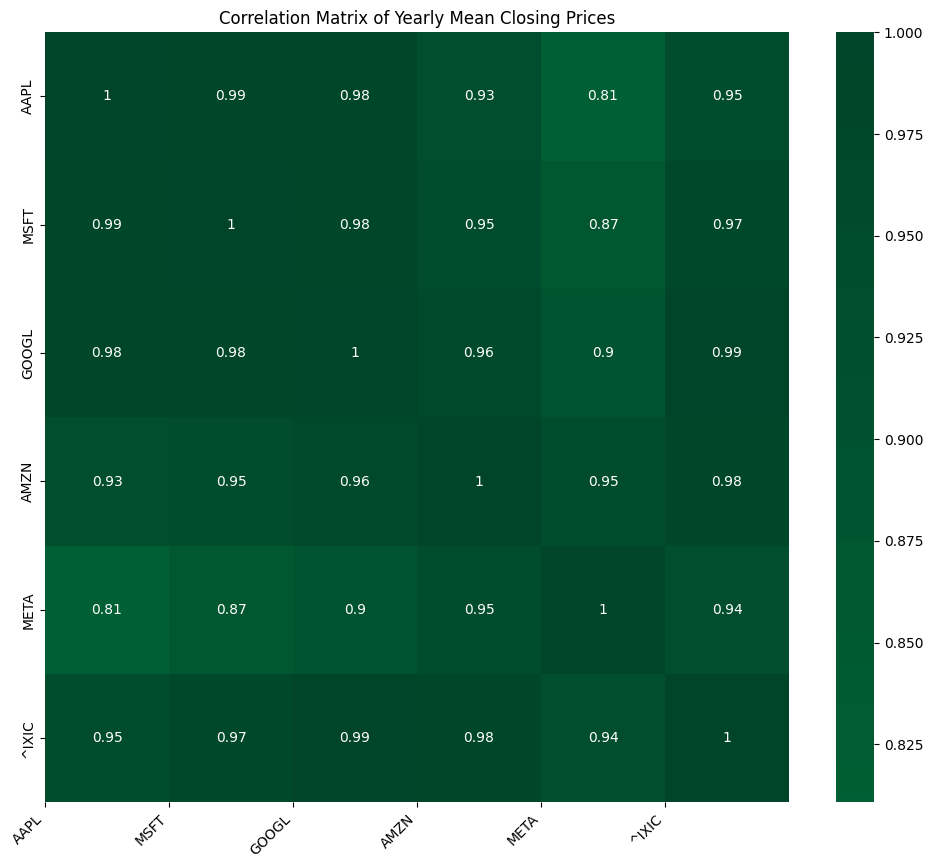

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assume you have a dictionary 'dfs' containing DataFrames for each ticker

# Create a grid layout for subplots
num_rows = 2
num_cols = 3


# Flatten the 2D array of subplots for easier iteration
axs = axs.flatten()

# List to store yearly means for each stock
yearly_mean_dict = {}

for i, (ticker, df) in enumerate(dfs.items()):
    # Resample the data to yearly frequency and calculate the mean
    yearly_mean = df['Close'].resample('Y').mean()

    # Append yearly mean to the list
    yearly_mean_dict[ticker] = yearly_mean

# Remove any empty subplots if the number of stocks is less than the total number of subplots
for j in range(len(dfs), num_rows * num_cols):
    fig.delaxes(axs[j])

# Combine the yearly means into a single DataFrame
correlation_df = pd.concat(yearly_mean_dict, axis=1)

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix with ticker names and values using Seaborn
plt.figure(figsize=(12, 10))
plt.title('Correlation Matrix of Yearly Mean Closing Prices')

# Specify the color map and center the colormap at 0 for better visualization
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='YlGn', center=0)

# Add tickers on top of the heatmap
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.show()

#stationality test, rolling stats and ADCF test

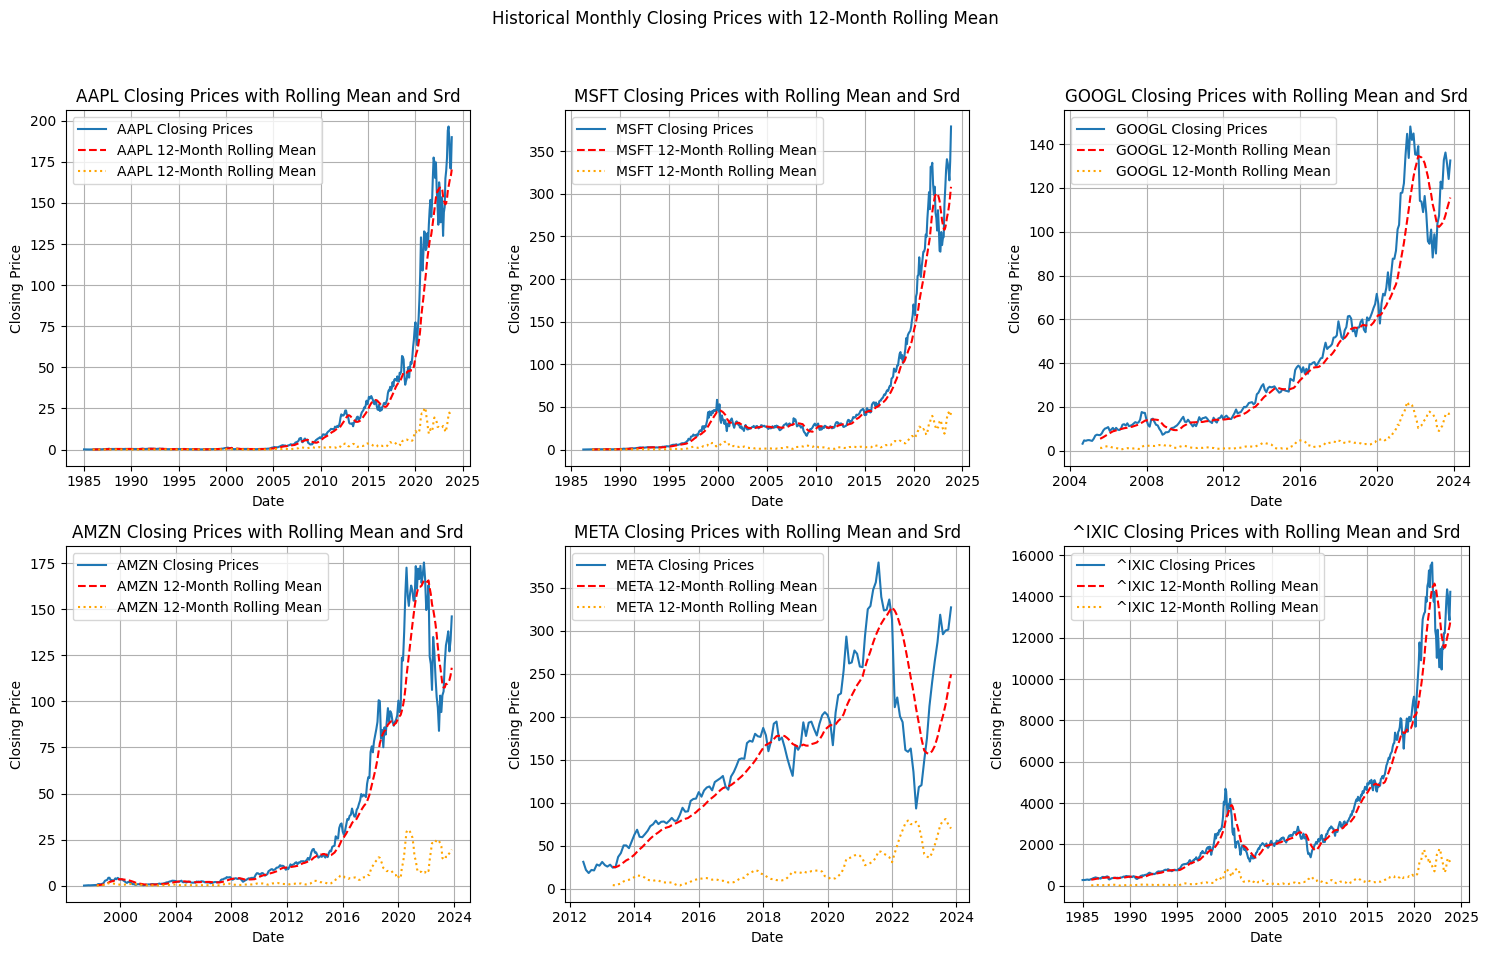

In [ ]:
import matplotlib.pyplot as plt

# Create a grid layout for subplots
num_rows = 2
num_cols = 3

# Iterate through the dictionary and plot line charts with rolling mean in a grid
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.suptitle('Historical Monthly Closing Prices with 12-Month Rolling Mean')

# Flatten the 2D array of subplots for easier iteration
axs = axs.flatten()

for i, (ticker, df) in enumerate(dfs.items()):
    # Calculate 12-month rolling mean
    rolling_mean = df['Close'].rolling(window=12).mean()
    rolling_std = df['Close'].rolling(window=12).std()

    axs[i].plot(df.index, df['Close'], label=f'{ticker} Closing Prices')
    axs[i].plot(df.index, rolling_mean, label=f'{ticker} 12-Month Rolling Mean', color='red', linestyle='--')
    axs[i].plot(df.index, rolling_std, label=f'{ticker} 12-Month Rolling Mean', color='orange', linestyle=':')

    axs[i].set_title(f'{ticker} Closing Prices with Rolling Mean and Srd')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Closing Price')
    axs[i].legend()
    axs[i].grid(True)

# Remove any empty subplots if the number of stocks is less than the total number of subplots
for j in range(len(dfs), num_rows * num_cols):
    fig.delaxes(axs[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for the title
plt.show()


#ADF test

In [ ]:
from statsmodels.tsa.stattools import adfuller


# Iterate through the dictionary and perform ADF test for each stock
for i, (ticker, df_stock) in enumerate(dfs.items()):
    closing_prices = df_stock['Close']

    # Perform ADF test
    result = adfuller(closing_prices)

    # Print results
    print(f"\nADF Test Results for {ticker} (Index {i}):")
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

    if result[1] <= 0.05:
        print("Reject the null hypothesis. The time series is likely stationary.")
    else:
        print("Fail to reject the null hypothesis. The time series may not be stationary.")



ADF Test Results for AAPL (Index 0):
ADF Statistic: 2.149793649463908
p-value: 0.9988385879911604
Critical Values: {'1%': -3.444965543297668, '5%': -2.8679842369272976, '10%': -2.5702025382716047}
Fail to reject the null hypothesis. The time series may not be stationary.

ADF Test Results for MSFT (Index 1):
ADF Statistic: 2.6927181347109044
p-value: 0.9990866001293075
Critical Values: {'1%': -3.445542818501549, '5%': -2.868238133603207, '10%': -2.5703378690483176}
Fail to reject the null hypothesis. The time series may not be stationary.

ADF Test Results for GOOGL (Index 2):
ADF Statistic: 0.7803997084427353
p-value: 0.9913131034719022
Critical Values: {'1%': -3.461136478222043, '5%': -2.875078880098608, '10%': -2.5739861168199027}
Fail to reject the null hypothesis. The time series may not be stationary.

ADF Test Results for AMZN (Index 3):
ADF Statistic: 0.1395986354731155
p-value: 0.9686629737317788
Critical Values: {'1%': -3.4521902441030963, '5%': -2.871158406898617, '10%': -2

#Extracting the trend, seasonal and residual patterns from time series data.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


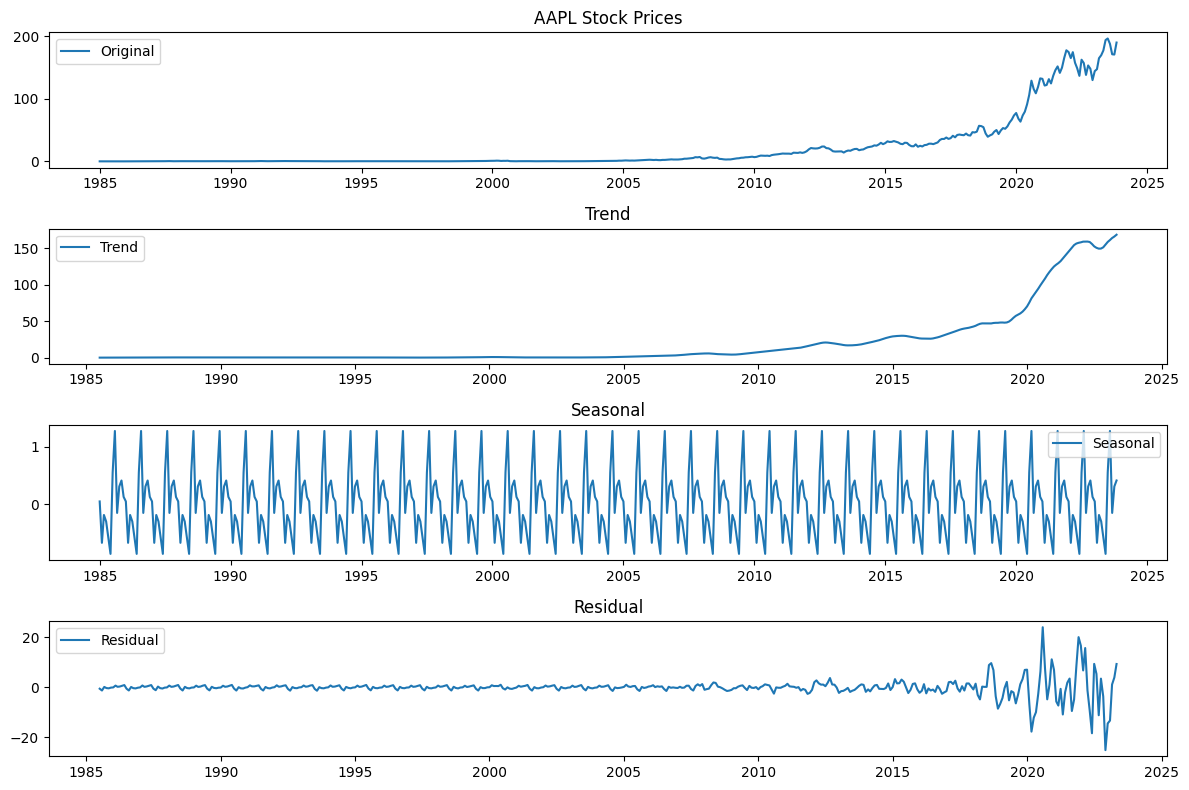


ARIMA Model Summary for AAPL:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  373
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -337.268
Date:                Sat, 02 Dec 2023   AIC                            690.535
Time:                        02:24:35   BIC                            721.887
Sample:                    01-01-1985   HQIC                           702.986
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2341      0.028     -8.236      0.000      -0.290      -0.178
ar.L2         -0.9261      0.027    -33.706      0.000      -0.980      -0.872
ar.L3          0.3799

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


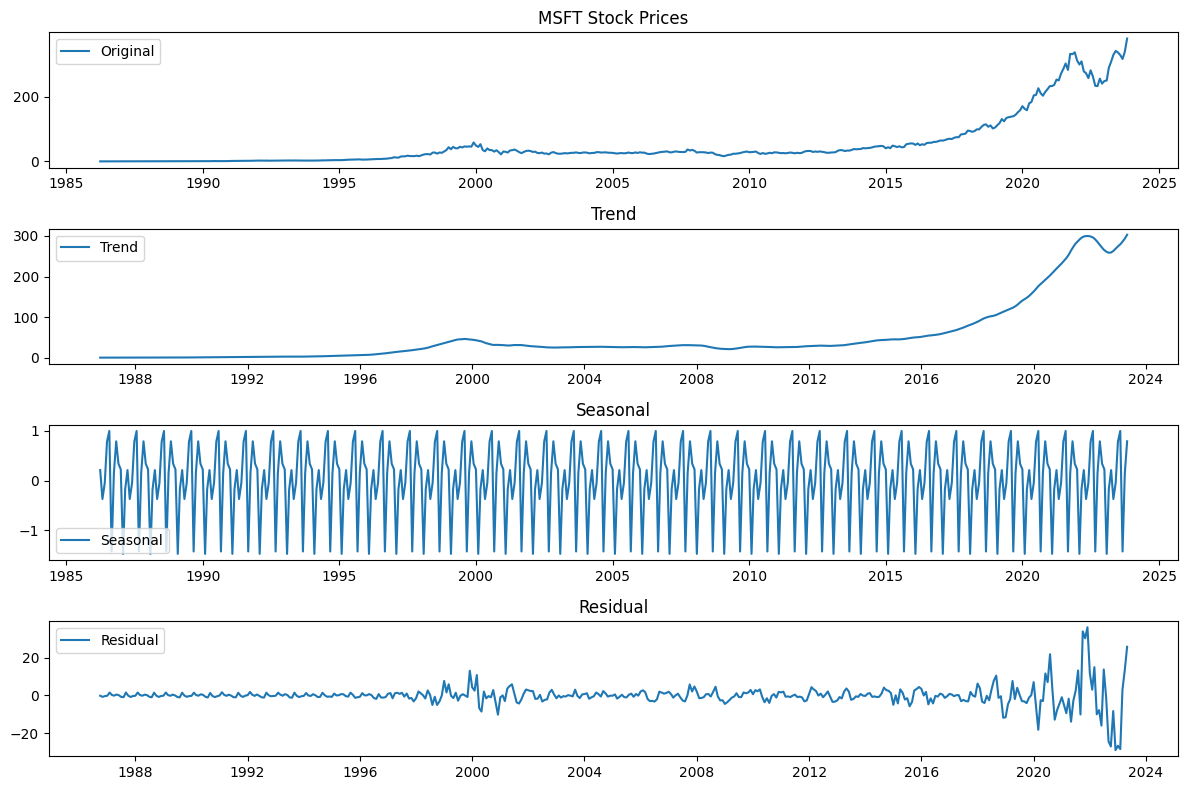


ARIMA Model Summary for MSFT:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  361
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -821.047
Date:                Sat, 02 Dec 2023   AIC                           1658.095
Time:                        02:24:40   BIC                           1689.184
Sample:                    04-01-1986   HQIC                          1670.456
                         - 04-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7686      0.487     -1.579      0.114      -1.723       0.186
ar.L2          0.0224      0.450      0.050      0.960      -0.859       0.904
ar.L3          0.1583

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


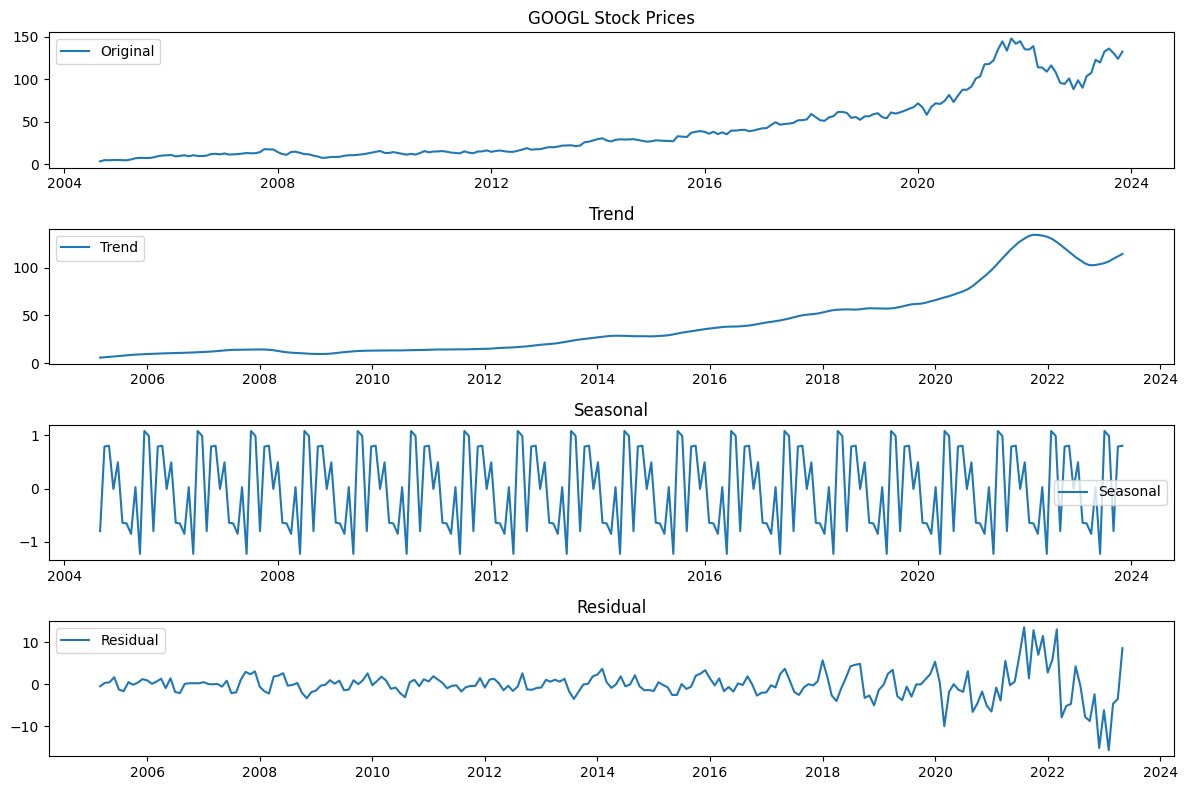


ARIMA Model Summary for GOOGL:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  184
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -368.441
Date:                Sat, 02 Dec 2023   AIC                            752.881
Time:                        02:24:43   BIC                            778.557
Sample:                    09-01-2004   HQIC                           763.289
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1269      1.308     -0.097      0.923      -2.691       2.437
ar.L2         -0.1920      1.261     -0.152      0.879      -2.663       2.279
ar.L3         -0.094

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


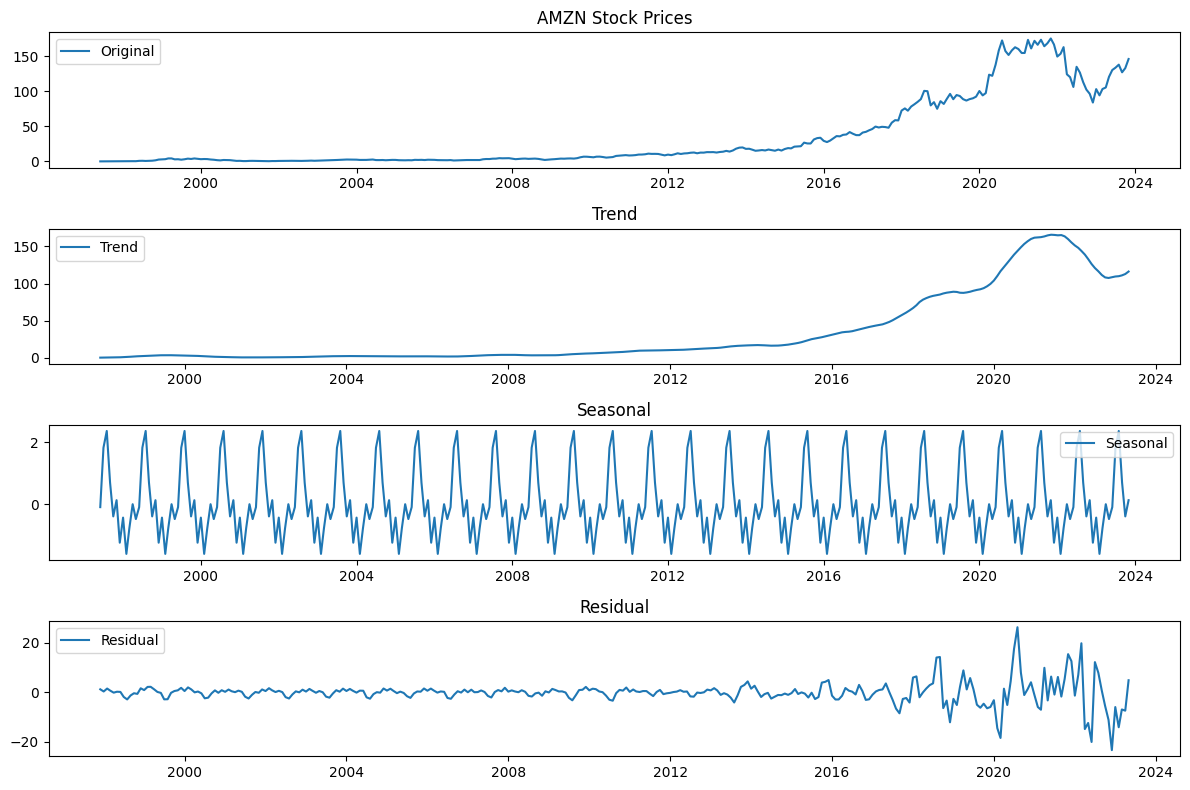


ARIMA Model Summary for AMZN:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  254
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -434.507
Date:                Sat, 02 Dec 2023   AIC                            885.015
Time:                        02:24:47   BIC                            913.282
Sample:                    06-01-1997   HQIC                           896.388
                         - 07-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7966      0.206      3.860      0.000       0.392       1.201
ar.L2         -0.0819      0.206     -0.398      0.690      -0.485       0.321
ar.L3          0.3928

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


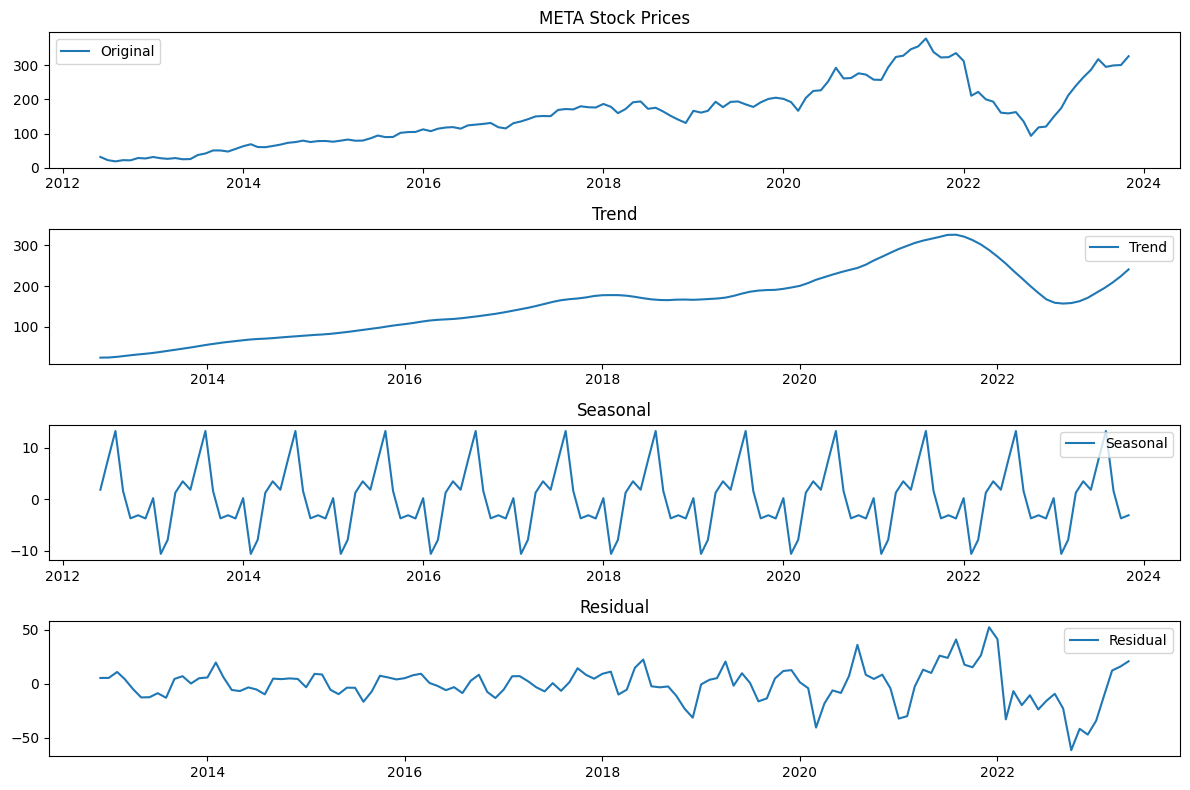


ARIMA Model Summary for META:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  110
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -417.923
Date:                Sat, 02 Dec 2023   AIC                            851.846
Time:                        02:24:50   BIC                            873.377
Sample:                    06-01-2012   HQIC                           860.578
                         - 07-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2905      0.102     12.629      0.000       1.090       1.491
ar.L2         -1.1567      0.170     -6.808      0.000      -1.490      -0.824
ar.L3          0.5206

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


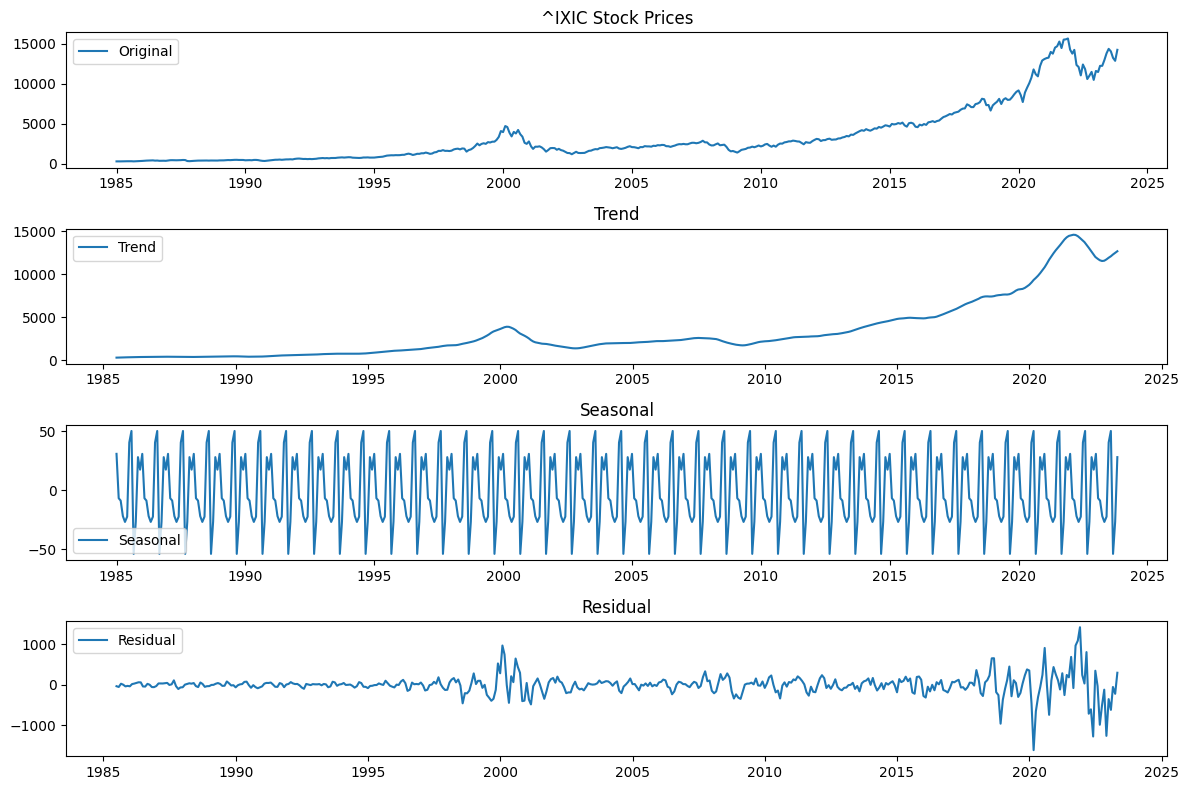


ARIMA Model Summary for ^IXIC:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  373
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -2384.483
Date:                Sat, 02 Dec 2023   AIC                           4784.965
Time:                        02:24:55   BIC                           4816.316
Sample:                    01-01-1985   HQIC                          4797.416
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0285      0.307      0.093      0.926      -0.573       0.630
ar.L2          0.6318      0.191      3.306      0.001       0.257       1.006
ar.L3         -0.044

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


# Function to build and forecast ARIMA model for a given stock
def build_arima_model(df_stock, ticker):
    closing_prices = df_stock['Close']

    # Split the data into training and testing sets
    train_size = int(len(closing_prices) * 0.8)
    train, test = closing_prices[:train_size], closing_prices[train_size:]

    # Build ARIMA model
    model = ARIMA(train, order=(5, 1, 2))
    model_fit = model.fit()

    # Decompose time series into components
    decomposition = seasonal_decompose(closing_prices, model='additive', period=12)

    # Plot results
    plt.figure(figsize=(12, 8))

    plt.subplot(4, 1, 1)
    plt.plot(closing_prices.index, closing_prices, label='Original')
    plt.legend()
    plt.title(f'{ticker} Stock Prices')

    plt.subplot(4, 1, 2)
    plt.plot(decomposition.trend.index, decomposition.trend, label='Trend')
    plt.legend()
    plt.title('Trend')

    plt.subplot(4, 1, 3)
    plt.plot(decomposition.seasonal.index, decomposition.seasonal, label='Seasonal')
    plt.legend()
    plt.title('Seasonal')

    plt.subplot(4, 1, 4)
    plt.plot(decomposition.resid.index, decomposition.resid, label='Residual')
    plt.legend()
    plt.title('Residual')

    plt.tight_layout()
    plt.show()

    # Return decomposition and model summary
    return decomposition, model_fit.summary()

# Iterate through the dictionary and build ARIMA model for each stock
for ticker, df_stock in dfs.items():
    decomposition, model_summary = build_arima_model(df_stock, ticker)

    # Print model summary
    print(f"\nARIMA Model Summary for {ticker}:")
    print(model_summary)

In [ ]:
!pip install pmdarima

#Building Arima Models

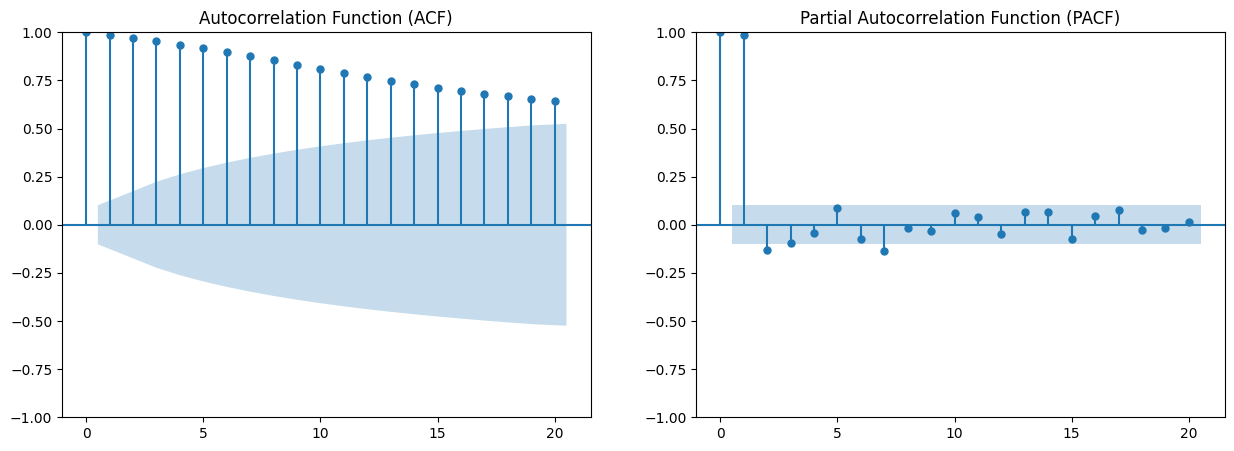

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


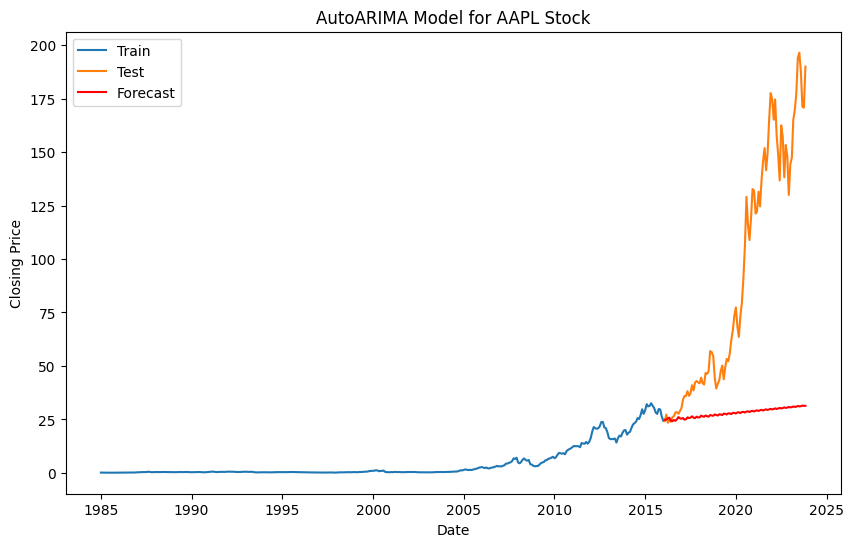


AutoARIMA Model Summary for AAPL:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  373
Model:               SARIMAX(4, 1, 5)   Log Likelihood                -327.698
Date:                Sat, 02 Dec 2023   AIC                            677.396
Time:                        02:26:08   BIC                            720.503
Sample:                    01-01-1985   HQIC                           694.515
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1314      0.076      1.735      0.083      -0.017       0.280
ar.L1          0.3014      0.036      8.360      0.000       0.231       0.372
ar.L2         -0.

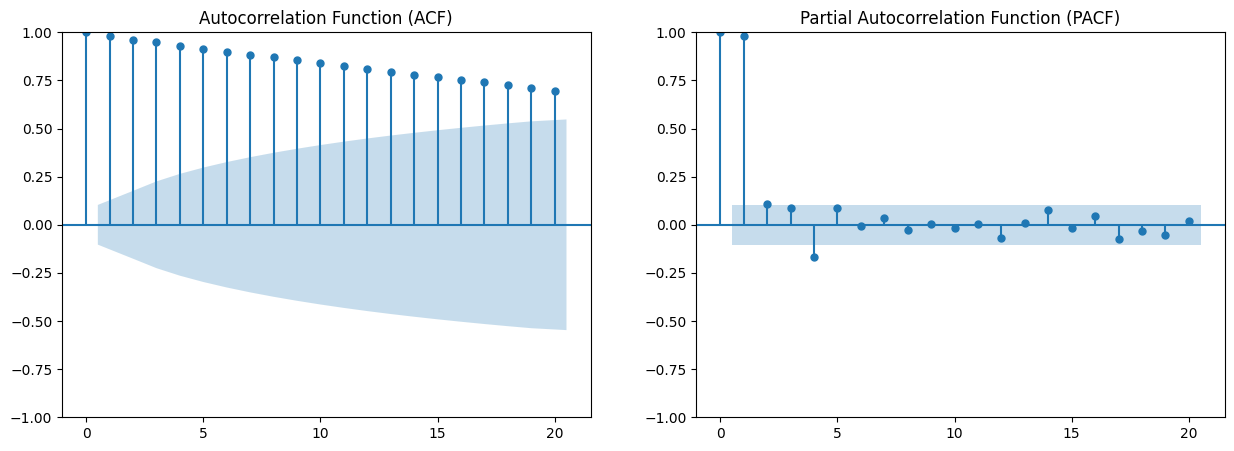

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


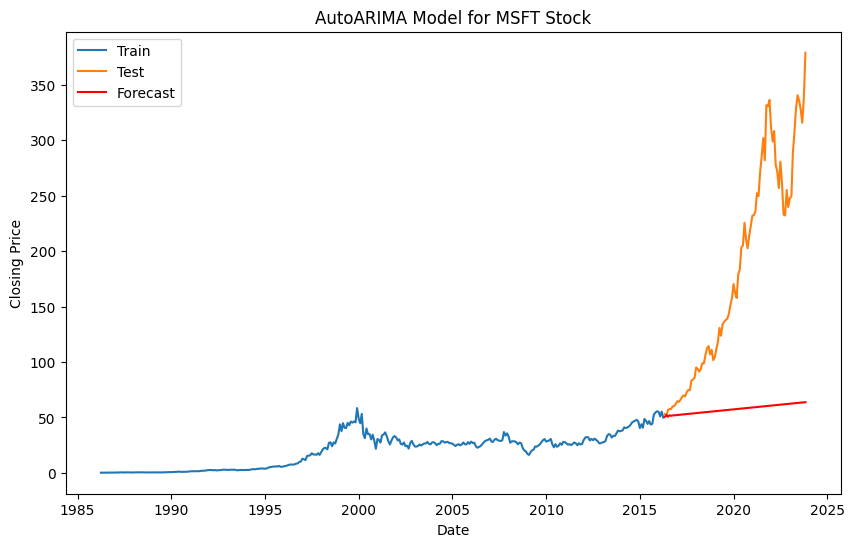


AutoARIMA Model Summary for MSFT:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  361
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -821.754
Date:                Sat, 02 Dec 2023   AIC                           1653.507
Time:                        02:26:13   BIC                           1672.938
Sample:                    04-01-1986   HQIC                          1661.233
                         - 04-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3319      0.227      1.461      0.144      -0.113       0.777
ar.L1         -1.0006      0.060    -16.615      0.000      -1.119      -0.883
ar.L2         -0.

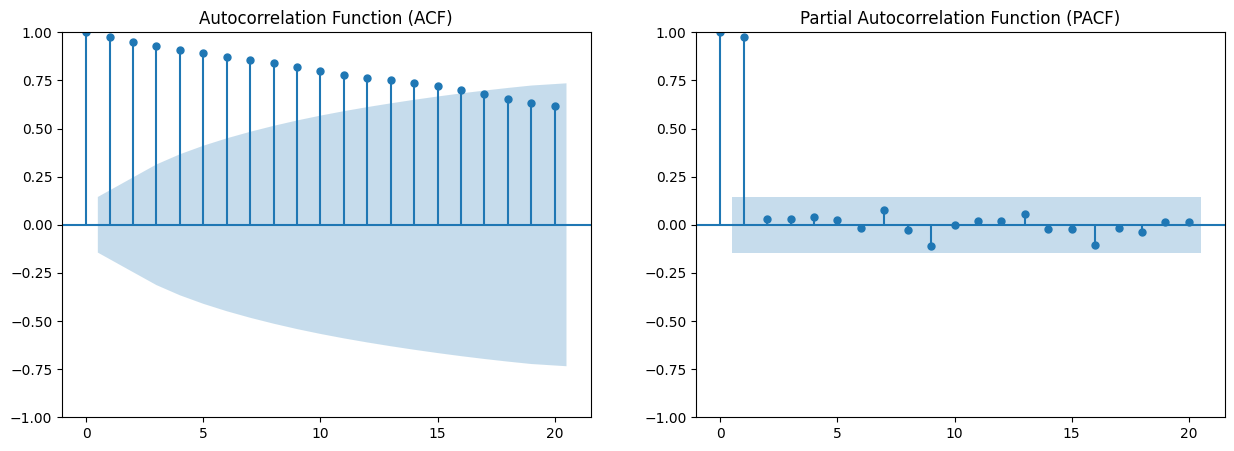

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


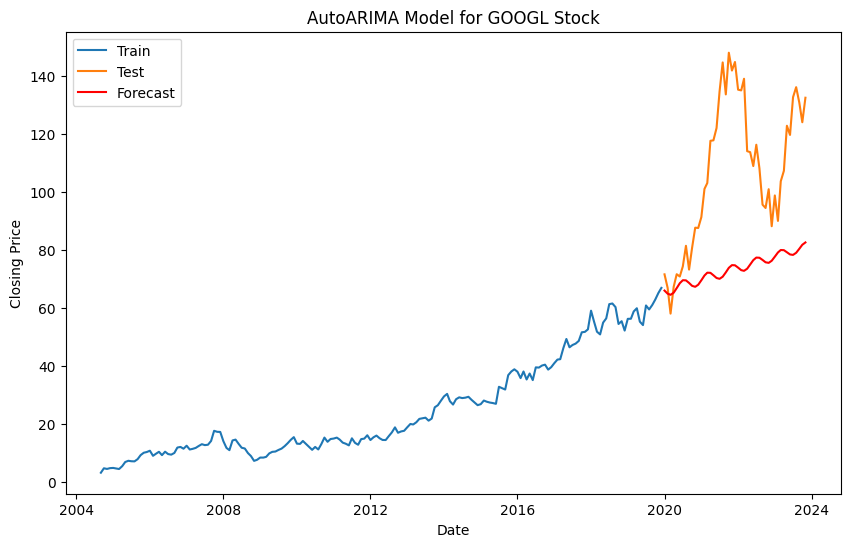


AutoARIMA Model Summary for GOOGL:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  184
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -358.179
Date:                Sat, 02 Dec 2023   AIC                            728.358
Time:                        02:26:18   BIC                            747.615
Sample:                    09-01-2004   HQIC                           736.163
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1959      0.078      2.527      0.012       0.044       0.348
ar.L1          1.4034      0.018     78.897      0.000       1.369       1.438
ar.L2         -0

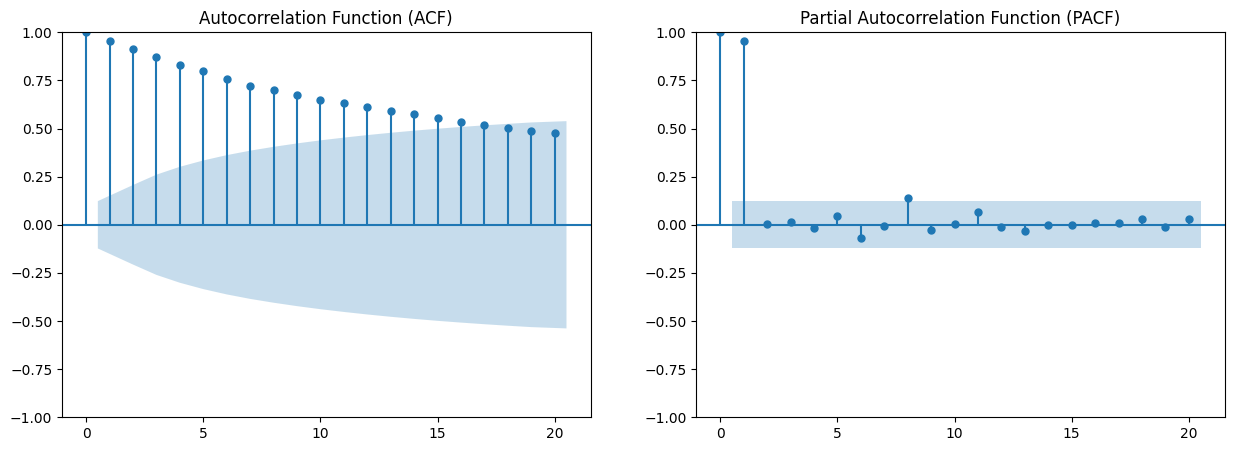

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


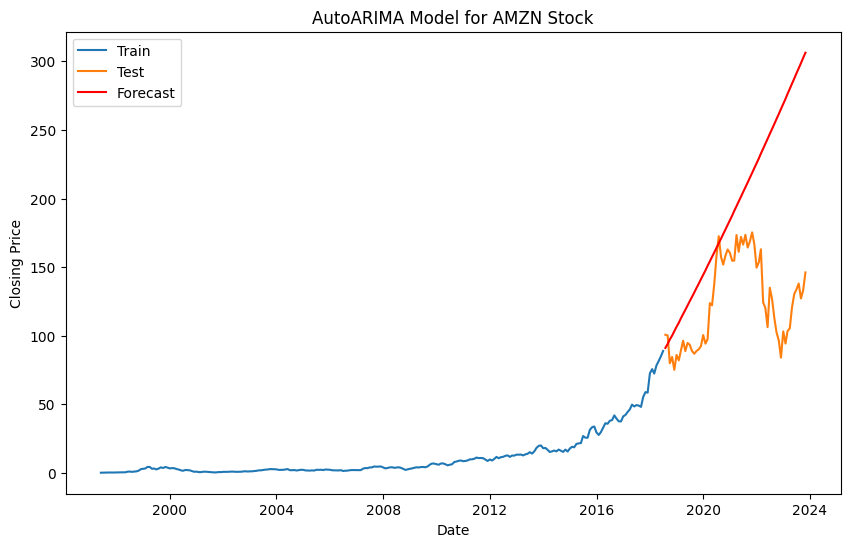


AutoARIMA Model Summary for AMZN:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  254
Model:               SARIMAX(4, 2, 1)   Log Likelihood                -431.871
Date:                Sat, 02 Dec 2023   AIC                            877.743
Time:                        02:26:27   BIC                            902.449
Sample:                    06-01-1997   HQIC                           887.684
                         - 07-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0170      0.016      1.071      0.284      -0.014       0.048
ar.L1         -0.0428      0.067     -0.642      0.521      -0.173       0.088
ar.L2         -0.

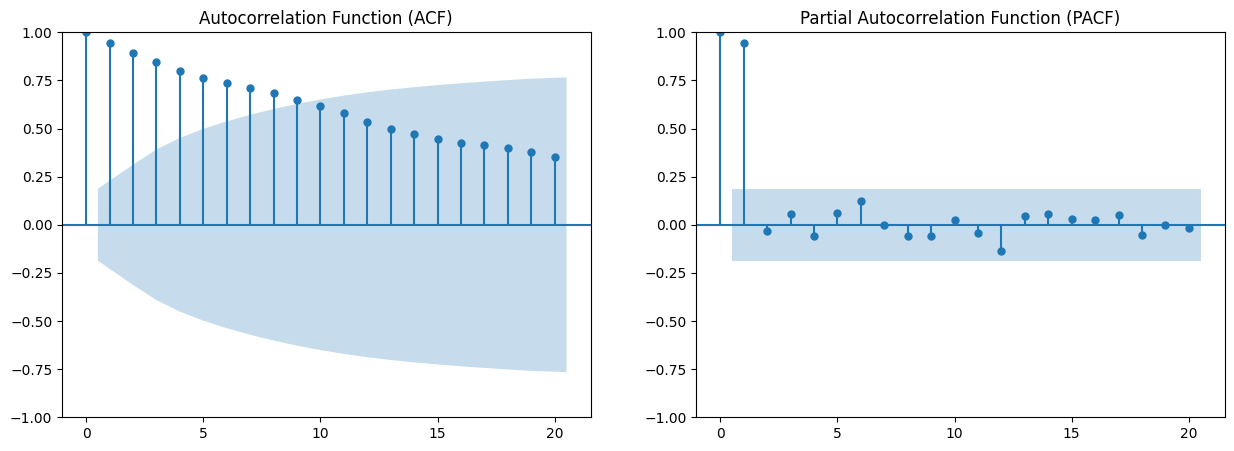

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


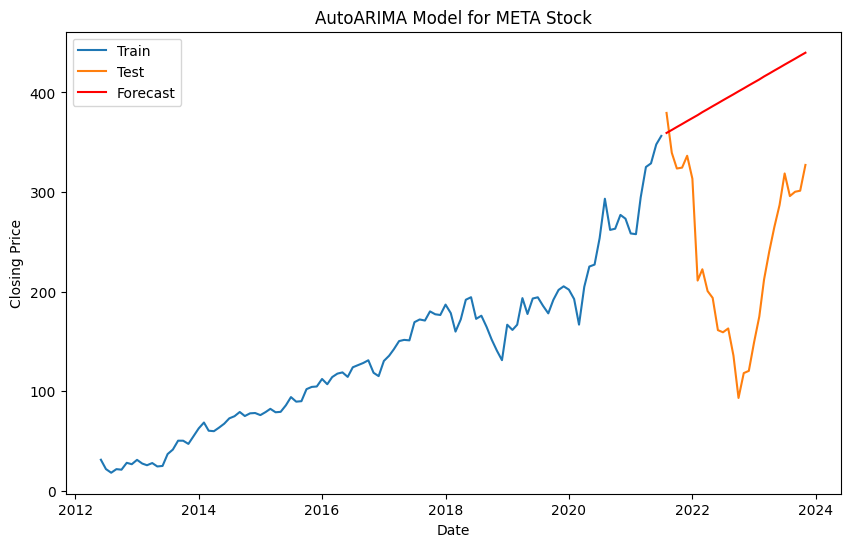


AutoARIMA Model Summary for META:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  110
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -424.688
Date:                Sat, 02 Dec 2023   AIC                            853.375
Time:                        02:26:28   BIC                            858.758
Sample:                    06-01-2012   HQIC                           855.558
                         - 07-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.9835      1.198      2.491      0.013       0.636       5.331
sigma2       141.8195     14.586      9.723      0.000     113.231     170.408
Ljung-Box (L1) (Q

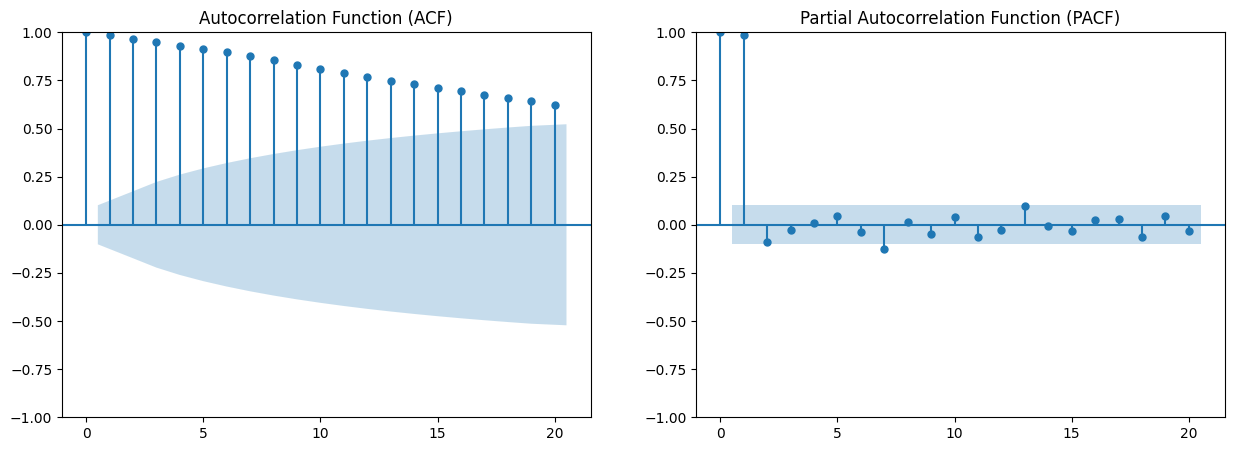

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


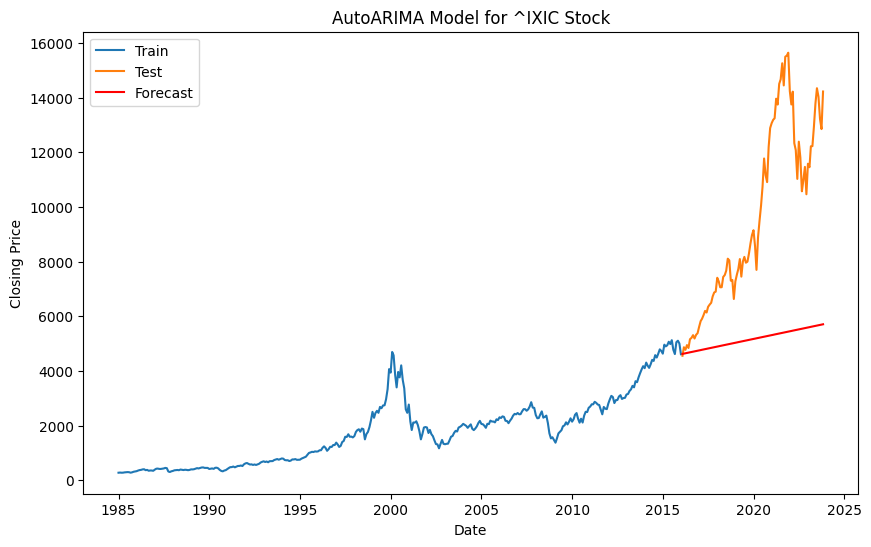


AutoARIMA Model Summary for ^IXIC:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  373
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2385.610
Date:                Sat, 02 Dec 2023   AIC                           4775.220
Time:                        02:26:30   BIC                           4783.058
Sample:                    01-01-1985   HQIC                          4778.332
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.6539      7.705      1.513      0.130      -3.448      26.756
sigma2      2.176e+04    718.269     30.300      0.000    2.04e+04    2.32e+04
Ljung-Box (L1) (

In [ ]:
import pandas as pd
import pmdarima as pm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Function to build and forecast ARIMA model for a given stock
def build_auto_arima_model(df_stock, ticker):
    closing_prices = df_stock['Close']

    # Split the data into training and testing sets
    train_size = int(len(closing_prices) * 0.8)
    train, test = closing_prices[:train_size], closing_prices[train_size:]

    # Plot ACF and PACF
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plot_acf(train, lags=20, ax=plt.gca())
    plt.title('Autocorrelation Function (ACF)')

    plt.subplot(1, 2, 2)
    plot_pacf(train, lags=20, ax=plt.gca())
    plt.title('Partial Autocorrelation Function (PACF)')

    plt.show()

    # Use auto ARIMA to determine the best (p, d, q) parameters
    auto_model = pm.auto_arima(train, seasonal=False, suppress_warnings=True)

    # Build ARIMA model with the selected parameters
    model = pm.ARIMA(order=auto_model.order)
    model_fit = model.fit(train)

    # Forecast
    forecast = model_fit.predict(len(test), return_conf_int=False)

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, label='Test')
    plt.plot(test.index, forecast, label='Forecast', color='red')
    plt.title(f'AutoARIMA Model for {ticker} Stock')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.show()

    # Return forecast and model summary
    return forecast, model_fit.summary()

# Iterate through the dictionary and build AutoARIMA model for each stock
for ticker, df_stock in dfs.items():
    forecast, model_summary = build_auto_arima_model(df_stock, ticker)

    # Print model summary
    print(f"\nAutoARIMA Model Summary for {ticker}:")
    print(model_summary)


#Recording Results for Arima Models

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Ticker', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

# Function to build and forecast ARIMA model for a given stock
def build_arima_model(df_stock, ticker):
    closing_prices = df_stock['Close']

    # Split the data into training and testing sets
    train_size = int(len(closing_prices) * 0.8)
    train, test = closing_prices[:train_size], closing_prices[train_size:]

    # Build ARIMA model
    model = ARIMA(train, order=(5, 1, 2))
    model_fit = model.fit()

    # Forecast on the test set
    forecast = model_fit.get_forecast(steps=len(test))
    predicted_values = forecast.predicted_mean

    # Evaluate model performance
    mae = mean_absolute_error(test, predicted_values)
    mse = mean_squared_error(test, predicted_values)
    rmse = np.sqrt(mse)

    # R2 Score Calculation
    r2 = r2_score(test, predicted_values)

    # Append results to the DataFrame
    results_df.loc[len(results_df)] = [ticker, mae, mse, rmse, r2]

    # Return decomposition and model summary
    return model_fit.summary()

# Iterate through the dictionary and build ARIMA model for each stock
for ticker, df_stock in dfs.items():
    model_summary = build_arima_model(df_stock, ticker)

# Display the results table
print("Results Table:")
print(results_df)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

Results Table:
  Ticker          MAE           MSE         RMSE  R2 Score
0   AAPL    68.394220  7.786685e+03    88.242196 -1.509214
1   MSFT   130.465330  2.604119e+04   161.372828 -1.885429
2  GOOGL    41.558052  2.315711e+03    48.121836 -2.763290
3   AMZN    50.090397  4.370057e+03    66.106409 -3.451551
4   META   112.975780  1.890849e+04   137.508128 -1.884607
5  ^IXIC  5025.117048  3.599128e+07  5999.273352 -2.362304


#Training and building RNN model

Epoch 1/10
12/12 - 18s - loss: 0.0014 - val_loss: 0.1392 - 18s/epoch - 1s/step
Epoch 2/10
12/12 - 0s - loss: 4.5713e-04 - val_loss: 0.0220 - 174ms/epoch - 15ms/step
Epoch 3/10
12/12 - 0s - loss: 1.6772e-04 - val_loss: 0.0184 - 158ms/epoch - 13ms/step
Epoch 4/10
12/12 - 0s - loss: 1.0885e-04 - val_loss: 0.0048 - 170ms/epoch - 14ms/step
Epoch 5/10
12/12 - 0s - loss: 5.1691e-05 - val_loss: 0.0064 - 173ms/epoch - 14ms/step
Epoch 6/10
12/12 - 0s - loss: 4.4285e-05 - val_loss: 0.0049 - 159ms/epoch - 13ms/step
Epoch 7/10
12/12 - 0s - loss: 4.9563e-05 - val_loss: 0.0083 - 199ms/epoch - 17ms/step
Epoch 8/10
12/12 - 0s - loss: 4.7064e-05 - val_loss: 0.0049 - 234ms/epoch - 20ms/step
Epoch 9/10
12/12 - 0s - loss: 5.8098e-05 - val_loss: 0.0050 - 192ms/epoch - 16ms/step
Epoch 10/10
12/12 - 0s - loss: 4.7636e-05 - val_loss: 0.0056 - 191ms/epoch - 16ms/step
3/3 [==============================] - 0s 7ms/step


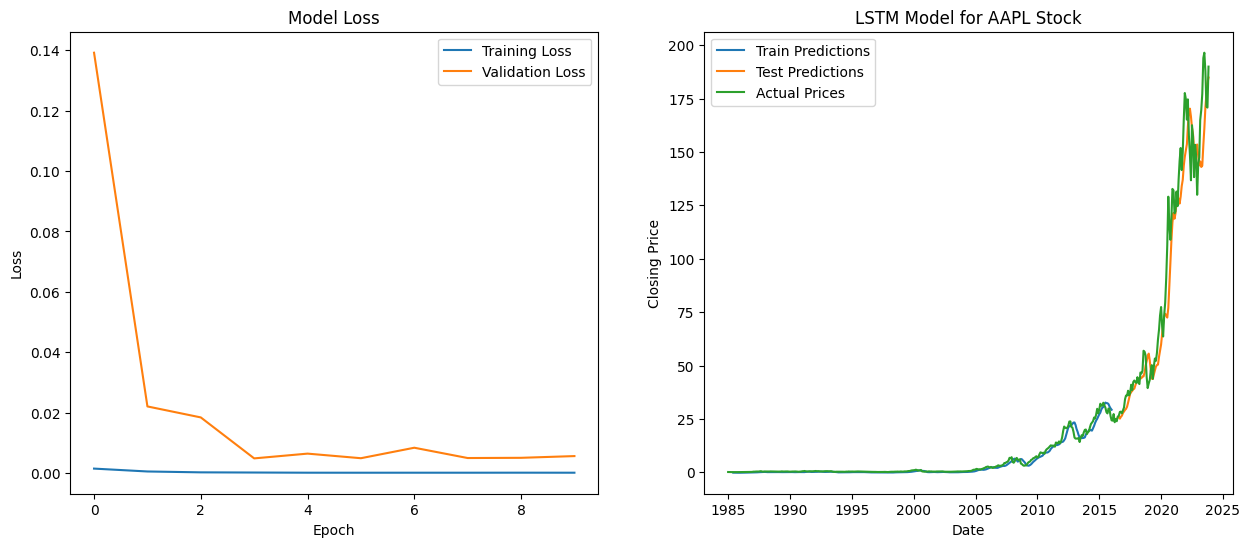


Training Loss for AAPL Stock:
[0.001408972661010921, 0.00045712923747487366, 0.0001677158143138513, 0.00010884860239457339, 5.169059295440093e-05, 4.4284723117016256e-05, 4.956252087140456e-05, 4.7064189857337624e-05, 5.8098161389352754e-05, 4.763593096868135e-05]

Testing Loss for AAPL Stock:
[0.1392231434583664, 0.0220121331512928, 0.01836889050900936, 0.004795280285179615, 0.006372684612870216, 0.004852388519793749, 0.008325579576194286, 0.004911486525088549, 0.004984631203114986, 0.00555756501853466]
1/1 [==============================] - 0s 21ms/step
Epoch 1/10
12/12 - 6s - loss: 0.0021 - val_loss: 0.2071 - 6s/epoch - 480ms/step
Epoch 2/10
12/12 - 0s - loss: 0.0012 - val_loss: 0.0835 - 117ms/epoch - 10ms/step
Epoch 3/10
12/12 - 0s - loss: 3.6705e-04 - val_loss: 0.0044 - 109ms/epoch - 9ms/step
Epoch 4/10
12/12 - 0s - loss: 1.4204e-04 - val_loss: 0.0152 - 107ms/epoch - 9ms/step
Epoch 5/10
12/12 - 0s - loss: 1.4260e-04 - val_loss: 0.0069 - 128ms/epoch - 11ms/step
Epoch 6/10
12/12 - 

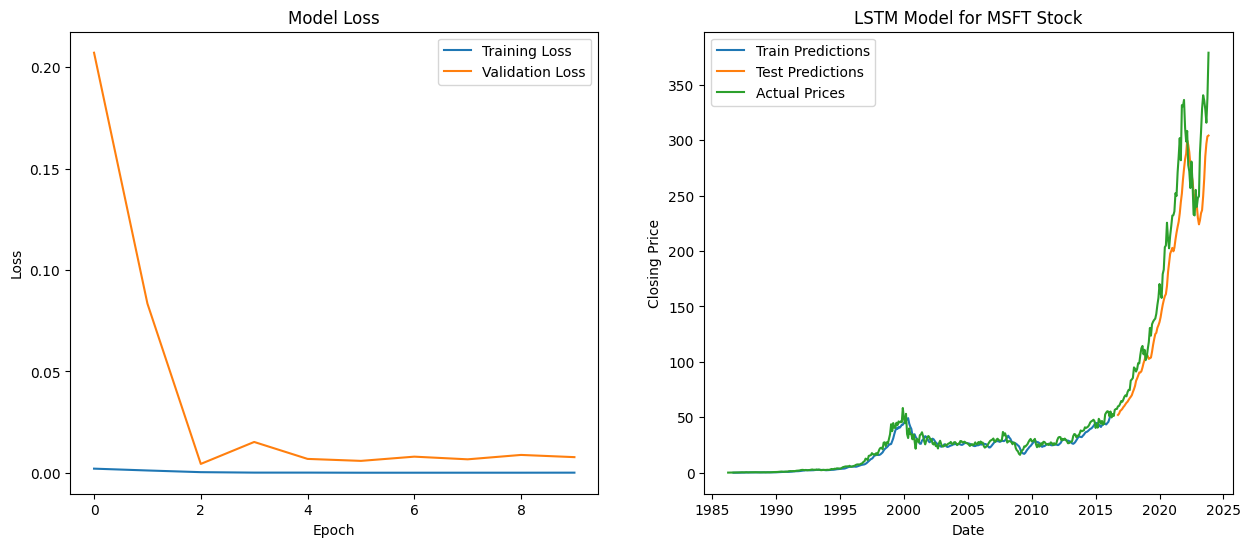


Training Loss for MSFT Stock:
[0.0020926601719111204, 0.0011962479911744595, 0.00036704560625366867, 0.0001420350163243711, 0.00014259717136155814, 8.88267531991005e-05, 9.359798423247412e-05, 9.758373926160857e-05, 9.906540799420327e-05, 0.00011866616841871291]

Testing Loss for MSFT Stock:
[0.2070857137441635, 0.08345188945531845, 0.004429223015904427, 0.015247832983732224, 0.006898945197463036, 0.00592459924519062, 0.008004489354789257, 0.006696347612887621, 0.0088582718744874, 0.007768585346639156]
1/1 [==============================] - 0s 30ms/step
Epoch 1/10
6/6 - 6s - loss: 0.0210 - val_loss: 0.1763 - 6s/epoch - 1s/step
Epoch 2/10
6/6 - 0s - loss: 0.0093 - val_loss: 0.1349 - 99ms/epoch - 17ms/step
Epoch 3/10
6/6 - 0s - loss: 0.0054 - val_loss: 0.0902 - 117ms/epoch - 20ms/step
Epoch 4/10
6/6 - 0s - loss: 0.0016 - val_loss: 0.0345 - 117ms/epoch - 20ms/step
Epoch 5/10
6/6 - 0s - loss: 0.0012 - val_loss: 0.0289 - 92ms/epoch - 15ms/step
Epoch 6/10
6/6 - 0s - loss: 0.0010 - val_loss:

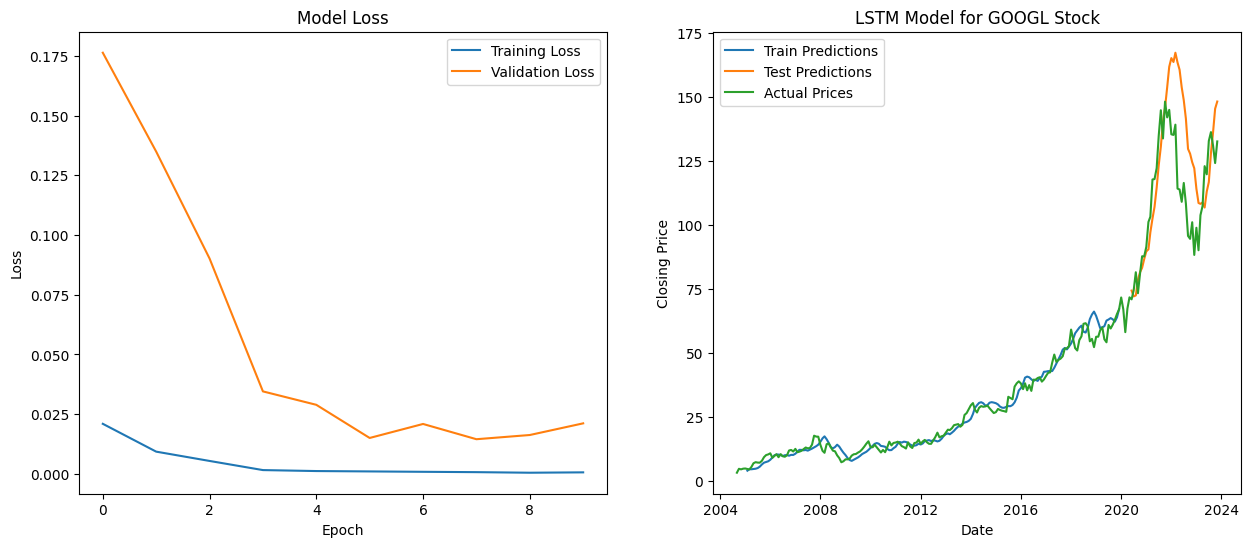


Training Loss for GOOGL Stock:
[0.020966874435544014, 0.009312784299254417, 0.005418876651674509, 0.0015929659130051732, 0.001186183886602521, 0.001031522173434496, 0.0008710272959433496, 0.0007271069916896522, 0.00048743915976956487, 0.0006428962224163115]

Testing Loss for GOOGL Stock:
[0.17632867395877838, 0.13494452834129333, 0.09018289297819138, 0.03453821316361427, 0.028920069336891174, 0.015038412064313889, 0.020901544019579887, 0.014515659771859646, 0.016277320683002472, 0.021159633994102478]
1/1 [==============================] - 0s 20ms/step
Epoch 1/10
8/8 - 6s - loss: 0.0102 - val_loss: 0.2427 - 6s/epoch - 803ms/step
Epoch 2/10
8/8 - 0s - loss: 0.0045 - val_loss: 0.0236 - 125ms/epoch - 16ms/step
Epoch 3/10
8/8 - 0s - loss: 5.2869e-04 - val_loss: 0.1137 - 121ms/epoch - 15ms/step
Epoch 4/10
8/8 - 0s - loss: 3.0830e-04 - val_loss: 0.0124 - 136ms/epoch - 17ms/step
Epoch 5/10
8/8 - 0s - loss: 3.3069e-04 - val_loss: 0.0230 - 113ms/epoch - 14ms/step
Epoch 6/10
8/8 - 0s - loss: 2.3

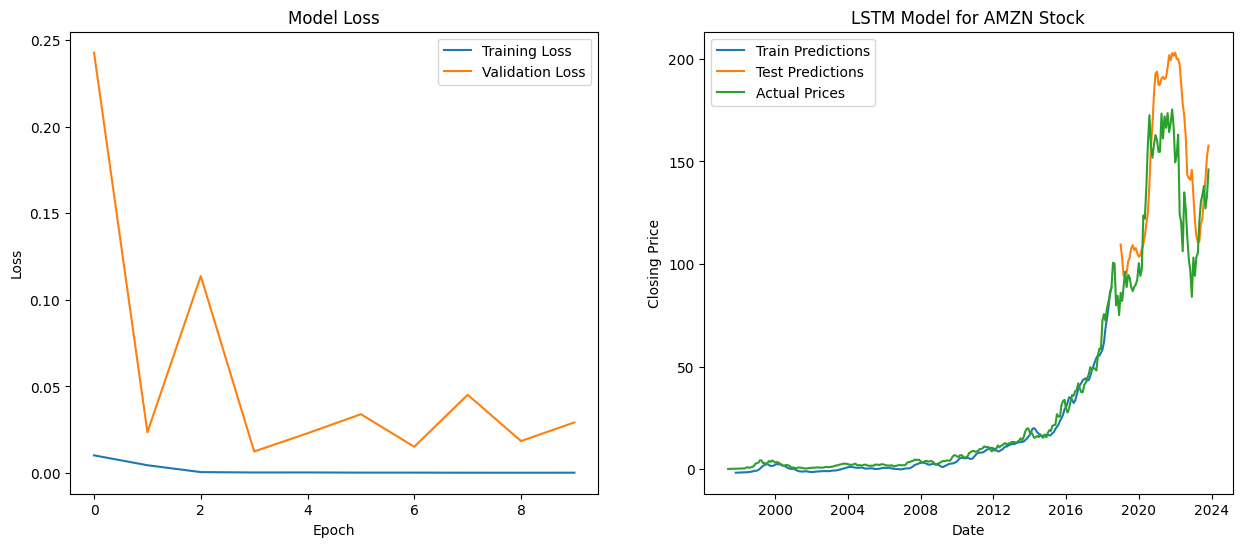


Training Loss for AMZN Stock:
[0.010198323987424374, 0.0044893682934343815, 0.0005286872619763017, 0.00030829652678221464, 0.00033069250639528036, 0.00023682073515374213, 0.00022503039508592337, 0.00019181339303031564, 0.00016979263455141336, 0.0001952632883330807]

Testing Loss for AMZN Stock:
[0.24271169304847717, 0.02356479875743389, 0.11370594799518585, 0.012429584749042988, 0.022969327867031097, 0.0339665412902832, 0.015151488594710827, 0.045181289315223694, 0.01845044456422329, 0.02923491783440113]
1/1 [==============================] - 0s 21ms/step
Epoch 1/10
4/4 - 8s - loss: 0.1419 - val_loss: 0.1773 - 8s/epoch - 2s/step
Epoch 2/10
4/4 - 0s - loss: 0.0558 - val_loss: 0.0318 - 61ms/epoch - 15ms/step
Epoch 3/10
4/4 - 0s - loss: 0.0303 - val_loss: 0.0394 - 65ms/epoch - 16ms/step
Epoch 4/10
4/4 - 0s - loss: 0.0194 - val_loss: 0.0456 - 66ms/epoch - 17ms/step
Epoch 5/10
4/4 - 0s - loss: 0.0187 - val_loss: 0.0454 - 63ms/epoch - 16ms/step
Epoch 6/10
4/4 - 0s - loss: 0.0139 - val_loss:

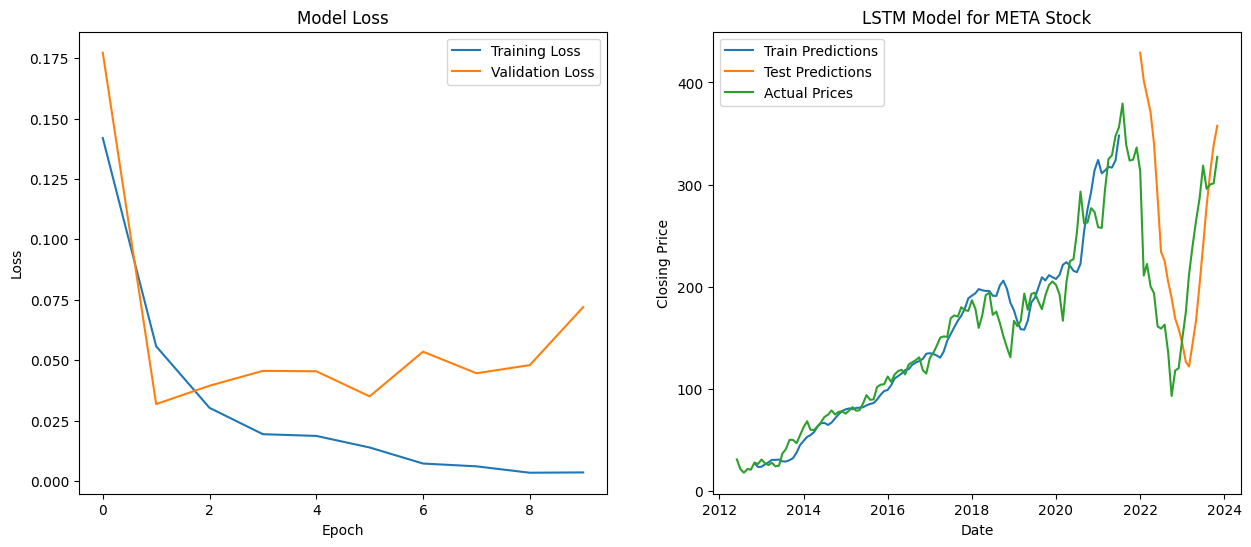


Training Loss for META Stock:
[0.14192631840705872, 0.05575196072459221, 0.030263053253293037, 0.019370991736650467, 0.01865391433238983, 0.013861997984349728, 0.007224470842629671, 0.006063147913664579, 0.0034208963625133038, 0.0035464332904666662]

Testing Loss for META Stock:
[0.17725098133087158, 0.03182293474674225, 0.03942292556166649, 0.045580096542835236, 0.04541211575269699, 0.035026781260967255, 0.05352042615413666, 0.04459214210510254, 0.04795103520154953, 0.07195697724819183]
1/1 [==============================] - 0s 45ms/step
Epoch 1/10
12/12 - 6s - loss: 0.0075 - val_loss: 0.1564 - 6s/epoch - 485ms/step
Epoch 2/10
12/12 - 0s - loss: 0.0017 - val_loss: 0.0162 - 127ms/epoch - 11ms/step
Epoch 3/10
12/12 - 0s - loss: 7.9595e-04 - val_loss: 0.0200 - 140ms/epoch - 12ms/step
Epoch 4/10
12/12 - 0s - loss: 4.6915e-04 - val_loss: 0.0057 - 133ms/epoch - 11ms/step
Epoch 5/10
12/12 - 0s - loss: 3.5474e-04 - val_loss: 0.0048 - 129ms/epoch - 11ms/step
Epoch 6/10
12/12 - 0s - loss: 3.61

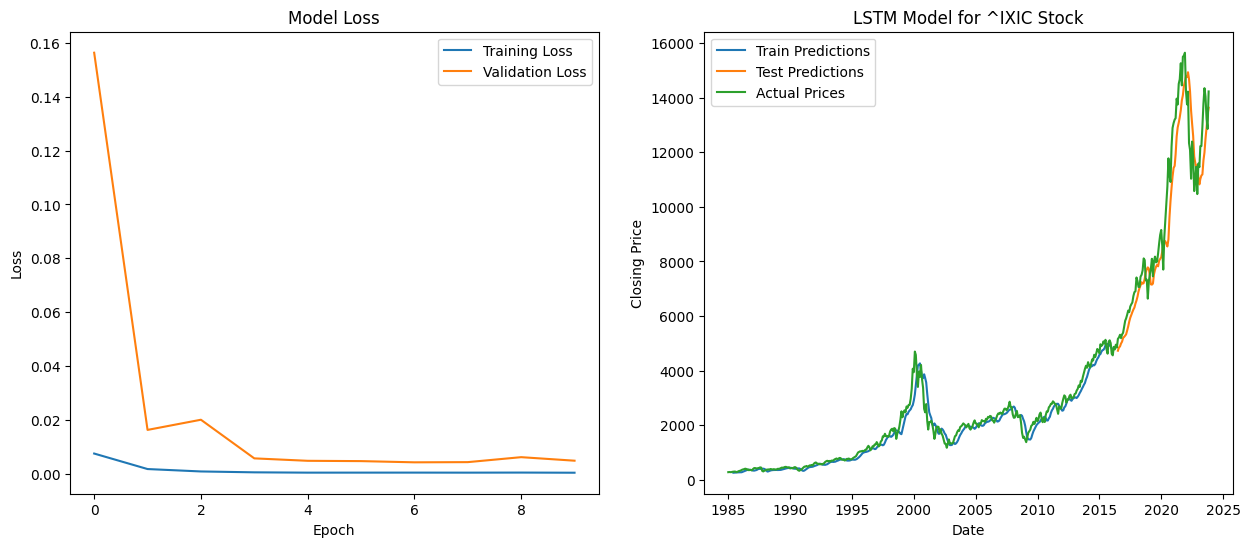


Training Loss for ^IXIC Stock:
[0.007451046258211136, 0.0016896285815164447, 0.0007959453505463898, 0.0004691466747317463, 0.00035473849857226014, 0.00036126840859651566, 0.0003681131056509912, 0.0003531554830260575, 0.00038011555443517864, 0.00032506202114745975]

Testing Loss for ^IXIC Stock:
[0.15637165307998657, 0.016232972964644432, 0.020011935383081436, 0.005658061243593693, 0.00475231884047389, 0.004637083970010281, 0.004189379513263702, 0.00425981730222702, 0.006102811545133591, 0.004791302140802145]
1/1 [==============================] - 0s 20ms/step

Losses Dictionary:
{'AAPL': {'training_loss': [0.001408972661010921, 0.00045712923747487366, 0.0001677158143138513, 0.00010884860239457339, 5.169059295440093e-05, 4.4284723117016256e-05, 4.956252087140456e-05, 4.7064189857337624e-05, 5.8098161389352754e-05, 4.763593096868135e-05], 'testing_loss': [0.1392231434583664, 0.0220121331512928, 0.01836889050900936, 0.004795280285179615, 0.006372684612870216, 0.004852388519793749, 0.0083

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


# Function to build and forecast LSTM model for a given stock
def build_lstm_model(df_stock, ticker):
    closing_prices = df_stock['Close'].values.reshape(-1, 1)

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    closing_prices_scaled = scaler.fit_transform(closing_prices)

    # Split the data into training and testing sets
    train_size = int(len(closing_prices_scaled) * 0.8)
    train, test = closing_prices_scaled[:train_size], closing_prices_scaled[train_size:]

    # Prepare data for LSTM
    def create_dataset(dataset, time_steps=1):
        dataX, dataY = [], []
        for i in range(len(dataset) - time_steps):
            a = dataset[i:(i + time_steps), 0]
            dataX.append(a)
            dataY.append(dataset[i + time_steps, 0])
        return np.array(dataX), np.array(dataY)

    time_steps = 5  # You can adjust this based on your preference
    X_train, y_train = create_dataset(train, time_steps)
    X_test, y_test = create_dataset(test, time_steps)

    # Reshape input to be [samples, time steps, features]
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(units=120, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(units=120, return_sequences=True))
    model.add(LSTM(units=120))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=2)

    # Make predictions
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    # Inverse transform to get original scale
    train_predict = scaler.inverse_transform(train_predict)
    test_predict = scaler.inverse_transform(test_predict)

    # Plot results and loss
    plt.figure(figsize=(15, 6))

    # Plot training loss and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot predictions and actual prices
    plt.subplot(1, 2, 2)
    plt.plot(df_stock.index[time_steps:len(train_predict) + time_steps], train_predict, label='Train Predictions')
    plt.plot(df_stock.index[train_size + time_steps:len(df_stock)+1], test_predict, label='Test Predictions')
    plt.plot(df_stock.index, df_stock['Close'], label='Actual Prices')
    plt.title(f'LSTM Model for {ticker} Stock')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()

    plt.show()

    # Return predictions and history
    return train_predict, test_predict, history, scaler, model


# Create a dictionary to store training and testing losses for each ticker
losses_dict = {}

# Dictionary to store the final predictions for each ticker
predictions_dict = {}

# Iterate through the dictionary and build LSTM model for each stock
for ticker, df_stock in dfs.items():
    train_predictions, test_predictions, history, scaler, model = build_lstm_model(df_stock, ticker)

    # Print training and testing losses for each epoch
    print(f"\nTraining Loss for {ticker} Stock:")
    print(history.history['loss'])

    print(f"\nTesting Loss for {ticker} Stock:")
    print(history.history['val_loss'])

    # Save losses to the dictionary
    losses_dict[ticker] = {'training_loss': history.history['loss'], 'testing_loss': history.history['val_loss']}

    # Extend the model to predict values for the next 10 years
    future_periods = 5 * 252

    time_steps=5
    # Prepare data for prediction
    last_data_point = df_stock['Close'].values[-time_steps:]
    future_predictions = []

    for i in range(future_periods):
        # Reshape input to be [samples, time steps, features]
        input_data = np.reshape(last_data_point, (1, time_steps, 1))

        # Predict next value
        next_value = model.predict(input_data)

        # Inverse transform to get the original scale
        next_value = scaler.inverse_transform(next_value)

        # Update last_data_point for the next iteration
        last_data_point = np.append(last_data_point[1:], next_value)
        future_predictions.append(next_value[0, 0])

    # Store the final predictions for each ticker
    predictions_dict[ticker] = {'train_predictions': train_predictions.flatten(),
                                'test_predictions': test_predictions.flatten(),
                                'future_predictions': np.array(future_predictions)}

# Print the losses dictionary
print("\nLosses Dictionary:")
print(losses_dict)

#Tabulating Metrics from RNN model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import r2_score

# Function to build and forecast LSTM model for a given stock
def build_lstm_model(df_stock, ticker):
    closing_prices = df_stock['Close'].values.reshape(-1, 1)

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    closing_prices_scaled = scaler.fit_transform(closing_prices)

    # Split the data into training and testing sets
    train_size = int(len(closing_prices_scaled) * 0.8)
    train, test = closing_prices_scaled[:train_size], closing_prices_scaled[train_size:]

    # Prepare data for LSTM
    def create_dataset(dataset, time_steps=1):
        dataX, dataY = [], []
        for i in range(len(dataset) - time_steps):
            a = dataset[i:(i + time_steps), 0]
            dataX.append(a)
            dataY.append(dataset[i + time_steps, 0])
        return np.array(dataX), np.array(dataY)

    time_steps = 5  # You can adjust this based on your preference
    X_train, y_train = create_dataset(train, time_steps)
    X_test, y_test = create_dataset(test, time_steps)

    # Reshape input to be [samples, time steps, features]
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(units=240, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(units=240, return_sequences=True))
    model.add(LSTM(units=240))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=2)

    # Make predictions
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    # Inverse transform to get original scale
    train_predict = scaler.inverse_transform(train_predict)
    test_predict = scaler.inverse_transform(test_predict)

    # Calculate R2 Score
    r2 = r2_score(test[time_steps:], test_predict)

    # Return predictions, history, scaler, model, and R2 score
    return train_predict, test_predict, history, scaler, model, r2


# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Ticker', 'MAE', 'MSE', 'RMSE', 'R2'])

# Create a dictionary to store training and testing losses for each ticker
losses_dict = {}

# Iterate through the dictionary and build LSTM model for each stock
for ticker, df_stock in dfs.items():
    train_predictions, test_predictions, history, scaler, model, r2 = build_lstm_model(df_stock, ticker)

    # Print training and testing losses for each epoch
    print(f"\nTraining Loss for {ticker} Stock:")
    print(history.history['loss'])

    print(f"\nTesting Loss for {ticker} Stock:")
    print(history.history['val_loss'])

    # Save losses and R2 score to the dictionary
    losses_dict[ticker] = {'training_loss': history.history['loss'], 'testing_loss': history.history['val_loss'], 'r2': r2}

    # Append results to the DataFrame
    results_df.loc[len(results_df)] = [ticker, r2, history.history['loss'][-1], history.history['val_loss'][-1], np.sqrt(history.history['val_loss'][-1])]

# Display the results table
print("\nResults Table:")
print(results_df)

# Display the losses dictionary
print("\nLosses Dictionary:")
print(losses_dict)


Epoch 1/10
12/12 - 6s - loss: 0.0013 - val_loss: 0.0381 - 6s/epoch - 503ms/step
Epoch 2/10
12/12 - 0s - loss: 2.4554e-04 - val_loss: 0.0160 - 118ms/epoch - 10ms/step
Epoch 3/10
12/12 - 0s - loss: 1.4415e-04 - val_loss: 0.0060 - 150ms/epoch - 12ms/step
Epoch 4/10
12/12 - 0s - loss: 6.5971e-05 - val_loss: 0.0173 - 166ms/epoch - 14ms/step
Epoch 5/10
12/12 - 0s - loss: 9.3317e-05 - val_loss: 0.0057 - 158ms/epoch - 13ms/step
Epoch 6/10
12/12 - 0s - loss: 5.0772e-05 - val_loss: 0.0059 - 148ms/epoch - 12ms/step
Epoch 7/10
12/12 - 0s - loss: 5.4721e-05 - val_loss: 0.0089 - 167ms/epoch - 14ms/step
Epoch 8/10
12/12 - 0s - loss: 5.2798e-05 - val_loss: 0.0046 - 155ms/epoch - 13ms/step
Epoch 9/10
12/12 - 0s - loss: 4.7678e-05 - val_loss: 0.0077 - 156ms/epoch - 13ms/step
Epoch 10/10
12/12 - 0s - loss: 4.8552e-05 - val_loss: 0.0062 - 152ms/epoch - 13ms/step
3/3 [==============================] - 0s 5ms/step

Training Loss for AAPL Stock:
[0.0012561283074319363, 0.0002455448848195374, 0.00014415310579

#Reading stock news data collecting in XLSX format

In [ ]:
import pandas as pd

file_path = 'Stock News.xlsx'

# Read the Excel file into a pandas DataFrame
newsDf = pd.read_excel(file_path)

final_news_dict={}

# Iterate over each column in the DataFrame
for column in newsDf.columns:
    # Get the values of the current column and convert them to a list
    column_values = newsDf[column].tolist()

    # Add the list of values to the dictionary with the column name as the key
    final_news_dict[column] = column_values

# Display the resulting dictionary
print(final_news_dict)

{'AAPL': ['Huawei, Xiaomi EV Launches Could Inspire Apple (NASDAQ:AAPL) - TipRanks.com', 'When Should You Buy Apple Inc. (NASDAQ:AAPL)?', "Apple Stock Could Be Boosted by China Demand. There Is No 'Growth Demise'.", "Apple's Growth Stalemate: 3 Reasons to Start Diversifying Away From AAPL Stock", 'What the latest headlines about Apple, Amazon and Nvidia mean for their stocks', 'Apple: Why The 10 Year Treasury May Offer Alpha (NASDAQ:AAPL)', "Apple's iPhone 15 Boosts Global Smartphone Sales, Ending 27-month Decline: Report - Apple (NASDAQ:AAPL)", 'Apple (AAPL) Expands Streaming Content for Holiday Season', 'AAPL, AMZN, or NVDA: Which “Strong Buy” Mega-Cap Tech Stock Could Deliver the Best Returns? - TipRanks.com', '2024 stock market forecasts are in. Bullish or bearish?', 'Apple (NASDAQ:AAPL): Boring, But Commands Massive Pricing ...', 'Will Apple Inc (AAPL) Outperform the Rest of the Stocks in the Technology Sector?', 'Apple (AAPL) Expands Streaming Content for Holiday Season', 'Guru F

In [ ]:
!pip install transformers

#Importing pre trained fin bert model

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="ProsusAI/finbert")

# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification

finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

#Predicting the sentiment and assigning sentiment scores to stocks.

In [ ]:
import numpy as np
sentimentDict={}

labels = {0:'neutral', 1:'positive',2:'negative'}


for ticker, news_list in final_news_dict.items():
    predList=[]
    posScore=0
    negScore=0
    neuScore=0
    for news in news_list:
      newsInp=news
      inputs = tokenizer(newsInp, return_tensors="pt")
      outputs = finbert(**inputs)[0]
      val = labels[np.argmax(outputs.detach().numpy())]
      if val=='negative':
        negScore+=1
      elif val=='positive':
        posScore+=1
      else:
        neuScore+=1
    sentimentDict[ticker]=posScore/(posScore+negScore+(neuScore/2))
sentimentDict

{'AAPL': 0.6060606060606061,
 'MSFT': 0.32,
 'GOOGL': 0.5517241379310345,
 'AMZN': 0.4827586206896552,
 'META': 0.5161290322580645,
 '^IXIC': 0.16}

In [ ]:
#Taking final prediction values after next 5 years and calculating percentage increase in stock

In [ ]:
finalPred={}
# Print the final predictions for the next 5 years
print("\nFinal Predictions for the Next 5 Years:")
for ticker, predictions in predictions_dict.items():
    finalPred[ticker]=predictions['future_predictions'][-1]
finalPred

In [ ]:
curPrice={}
for i, (ticker, df) in enumerate(dfs.items()):
  curPrice[ticker]=df['Close'][-1]
curPrice

{'AAPL': 189.9499969482422,
 'MSFT': 378.9100036621094,
 'GOOGL': 132.52999877929688,
 'AMZN': 146.08999633789062,
 'META': 327.1499938964844,
 '^IXIC': 14226.2197265625}

In [ ]:
def calculate_percentage_increase(dict_a, dict_b):
    percentage_increase = {}

    for key in dict_a:
        if key in dict_b:
            value_a = dict_a[key]
            value_b = dict_b[key]

            if value_a != 0:
                increase_percentage = ((value_b - value_a) / abs(value_a)) * 100
                percentage_increase[key] = increase_percentage
            else:
                # Handle the case where the value in dict_a is 0 to avoid division by zero
                percentage_increase[key] = float('inf')
        else:
            # Handle the case where the key is not present in dict_b
            percentage_increase[key] = None

    return percentage_increase


# Calculate percentage increase
percentage_increase_dict = calculate_percentage_increase(curPrice, finalPred)

# Print the result
for key, percentage_increase in percentage_increase_dict.items():
    print(f'{key}: {percentage_increase}% increase')


AAPL: 151.32259843967532% increase
MSFT: 129.23796743959446% increase
GOOGL: 325.5347829701182% increase
AMZN: 358.99119650676187% increase
META: 548.4790790640827% increase
^IXIC: 224.5103448058091% increase


#Giving final profit percentage from 0.75 weightage from RNN model and 0.25 from sentiment score from FinBert Model

In [ ]:


def combine_dicts(dict1, dict2, weight_dict1=0.75, weight_dict2=0.25):
    combined_dict = {}

    for key in dict1:
        if key in dict2:
            value_combined = (weight_dict1 * dict1[key]) + (weight_dict2 * dict2[key])
            combined_dict[key] = value_combined
        else:
            combined_dict[key] = dict1[key]

    # Add keys from dict2 that are not in dict1
    for key in dict2:
        if key not in dict1:
            combined_dict[key] = weight_dict2 * dict2[key]

    return combined_dict


# Combine dictionaries with weights
combined_dict = combine_dicts(percentage_increase_dict,sentimentDict)

# Print the result
for key, value in combined_dict.items():
    print(f'{key}: {value}')

#Assigning the Budget from the results optimally.

In [ ]:
import matplotlib.pyplot as plt


def calculate_ratios_and_allocate_budget(input_dict, total_budget):
    # Calculate the sum of all values in the dictionary
    total_value = sum(input_dict.values())

    # Calculate ratios for each key
    ratios = {key: value / total_value for key, value in input_dict.items()}

    # Allocate budget based on ratios
    allocated_budget = {key: int(ratio * total_budget) for key, ratio in ratios.items()}

    return ratios, allocated_budget

# Total budget
total_budget = 100000

# Calculate ratios and allocate budget
ratios, allocated_budget = calculate_ratios_and_allocate_budget(combined_dict, total_budget)

# Print the results
print("Ratios:")
for key, ratio in ratios.items():
    print(f'{key}: {ratio:.2%}')


allocated_budget = {'NASDAQ index fund' if key == '^IXIC' else key: value for key, value in allocated_budget.items()}

# Plot a pie chart
labels = list(allocated_budget.keys())
sizes = list(allocated_budget.values())

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

plt.title('Optimal Portfolio')
plt.show()
